Import Libraries

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
import numpy as np

**Dataset Overview**

In [99]:
data = pd.read_csv('House_Pricing.csv', index_col=False)
print(data)

               ID Date House was Sold  Sale Price  No of Bedrooms  \
0      7129300520     14 October 2017    221900.0               3   
1      6414100192    14 December 2017    538000.0               3   
2      5631500400    15 February 2016    180000.0               2   
3      2487200875    14 December 2017    604000.0               4   
4      1954400510    15 February 2016    510000.0               3   
...           ...                 ...         ...             ...   
21608   263000018         14 May 2017    360000.0               3   
21609  6600060120    15 February 2016    400000.0               4   
21610  1523300141        14 June 2017    402101.0               2   
21611   291310100     15 January 2016    400000.0               3   
21612  1523300157     14 October 2017    325000.0               2   

       No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0                 1.00               1180.0              5650.0           1.0   
1        

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [101]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Duplicate Removal**

In [102]:
duplicated_rows = data.duplicated()

In [103]:
duplicated_rows.sum()

np.int64(0)

In [104]:
data = data[~duplicated_rows]

In [105]:
data.shape

(21613, 21)

**Handling Missing Values**

In [106]:
data.isna()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [107]:
data.isna().sum()

,0
ID,0
Date House was Sold,0
Sale Price,4
No of Bedrooms,0
No of Bathrooms,4
Flat Area (in Sqft),9
Lot Area (in Sqft),9
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [108]:
data = data.drop('No of Times Visited', axis=1)

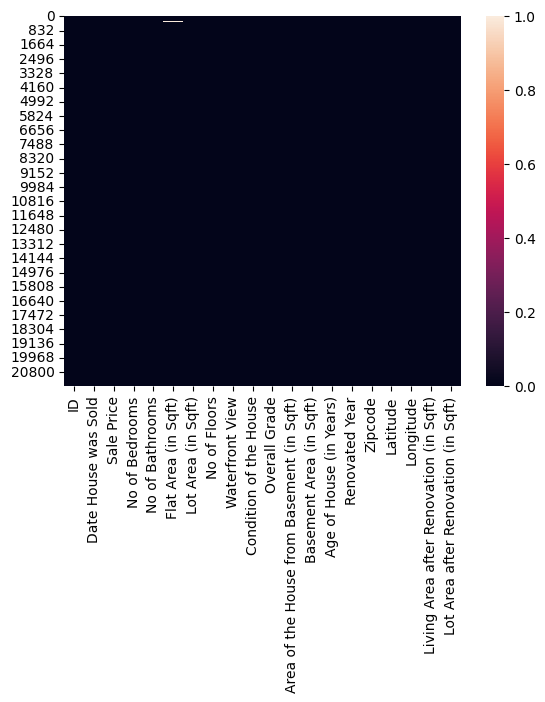

In [109]:
sns.heatmap(data.isna())
plt.show()

In [110]:
num_df = data.select_dtypes(include = "number")
cat_df = data.select_dtypes(include = "object_")

In [111]:
print("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)
print("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Numerical columns are
['ID', 'Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']
Categorical columns are
['Date House was Sold', 'Waterfront View', 'Condition of the House']


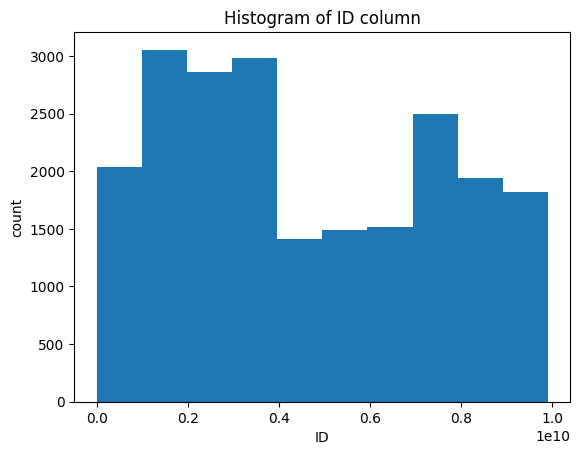

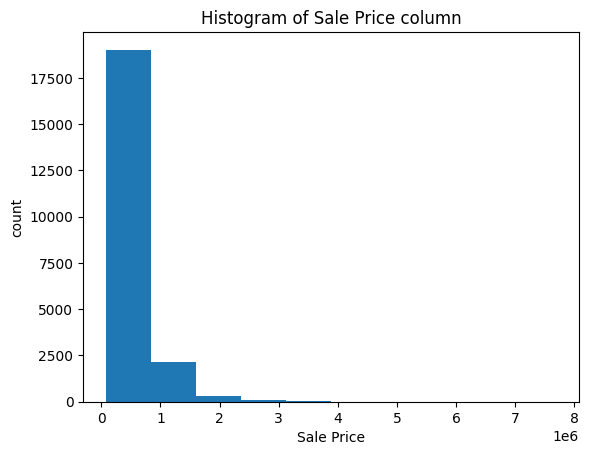

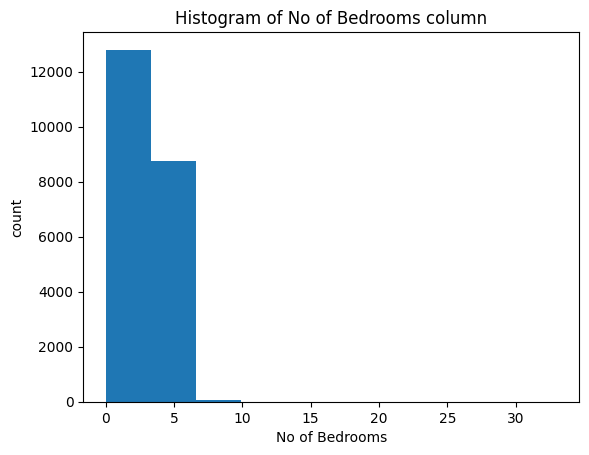

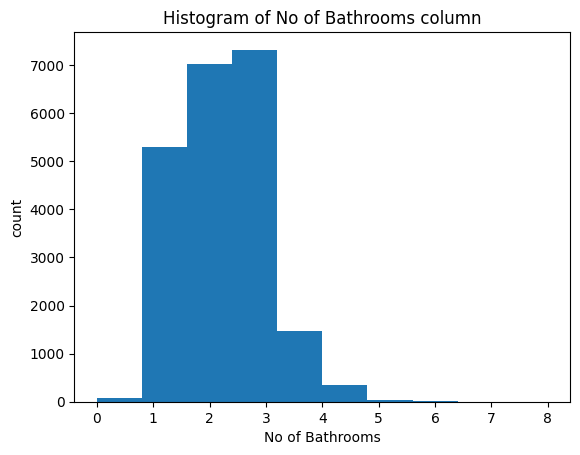

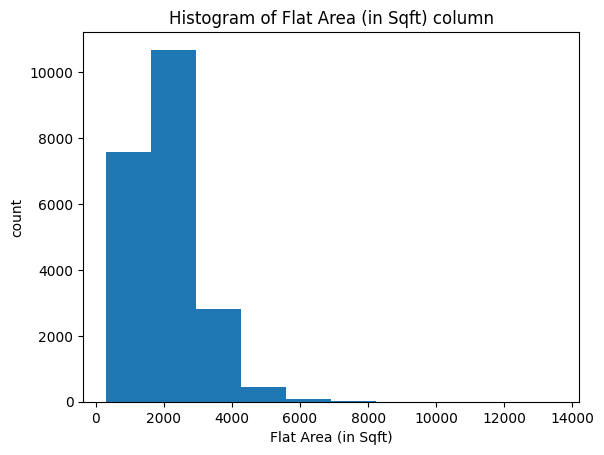

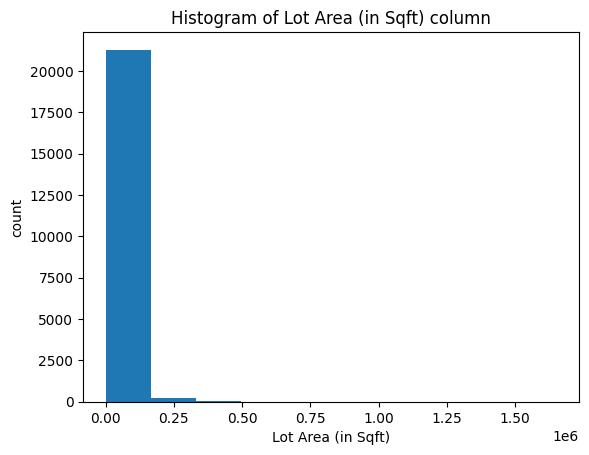

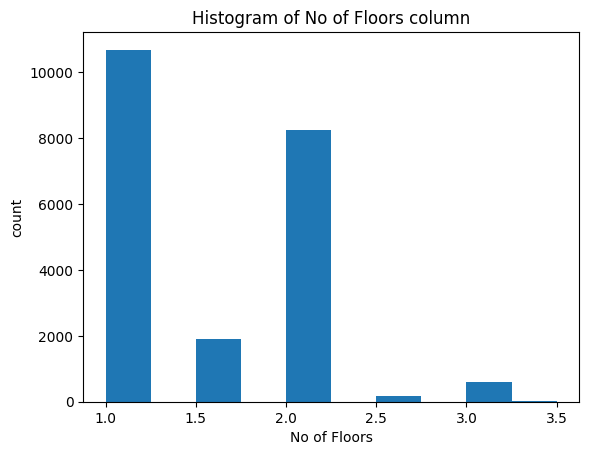

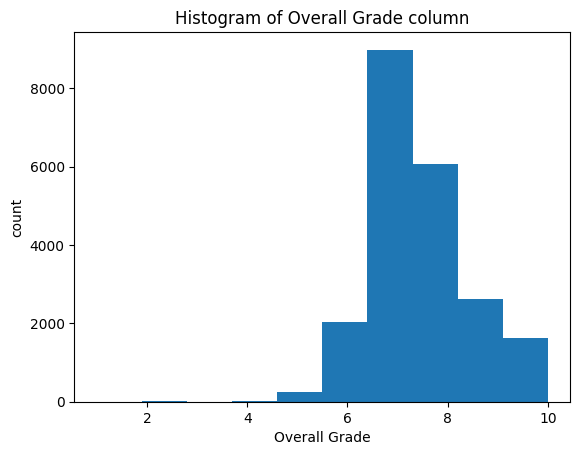

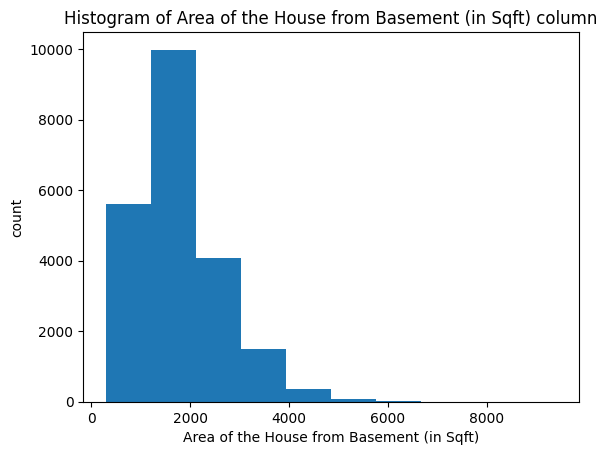

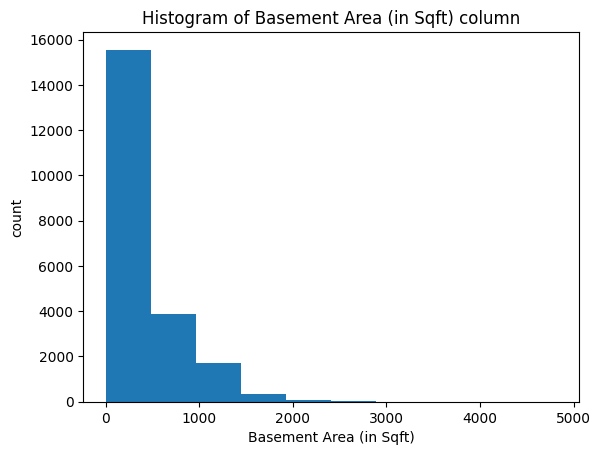

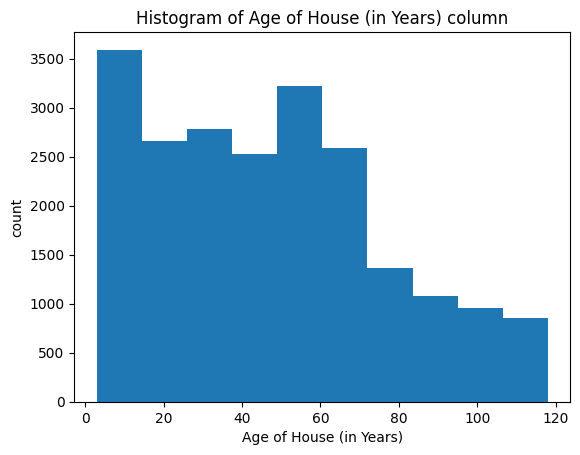

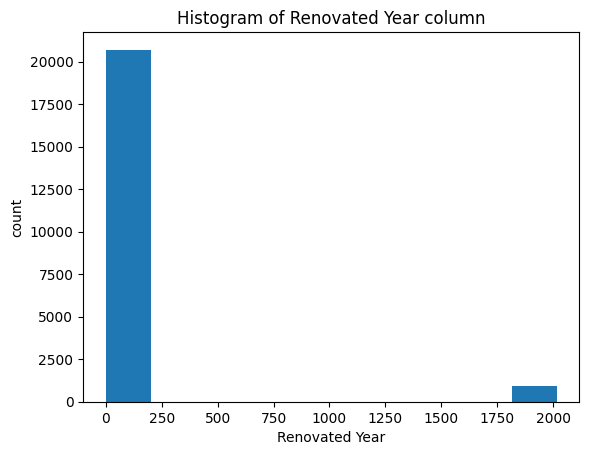

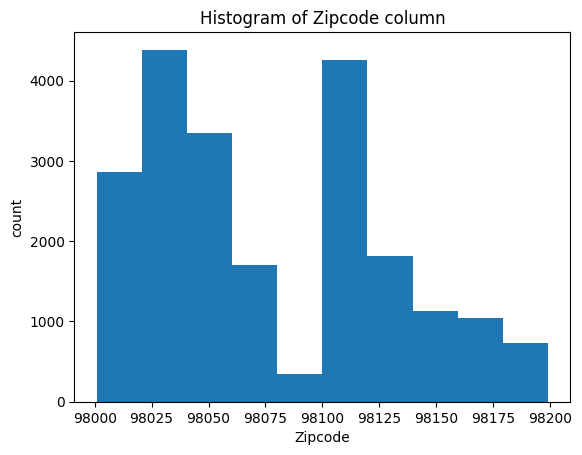

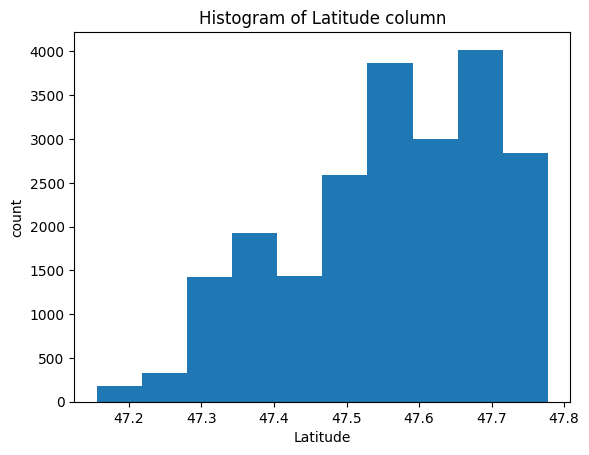

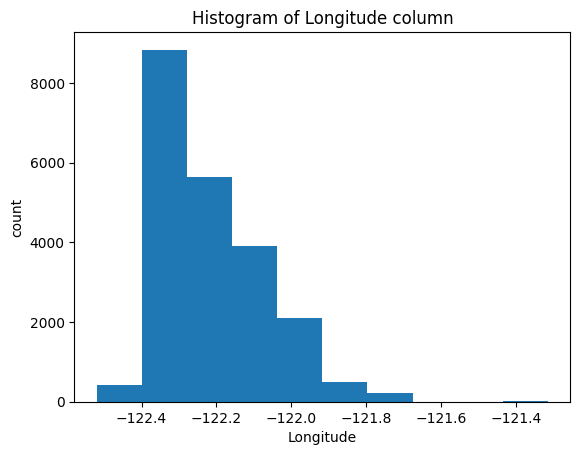

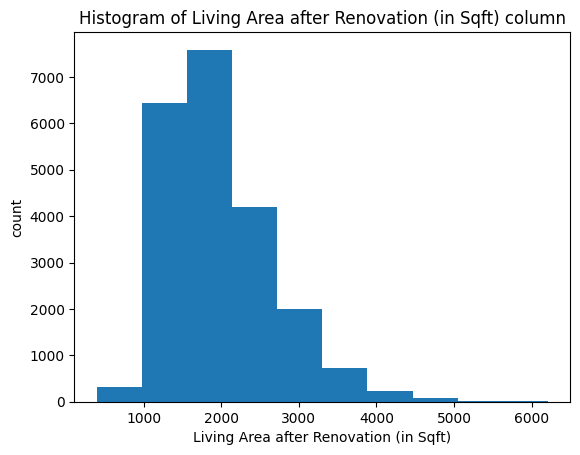

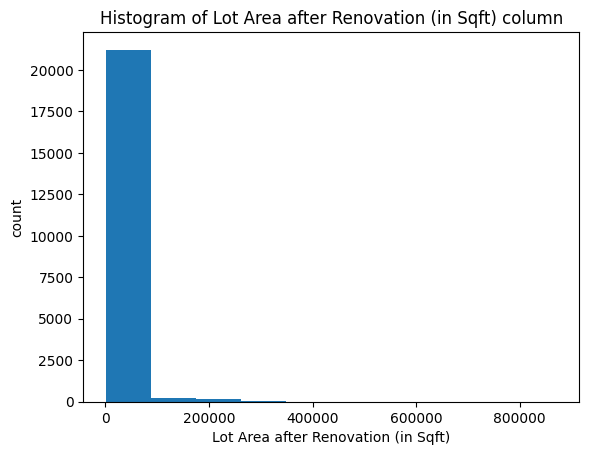

In [112]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.title("Histogram of {} column".format(col))
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()

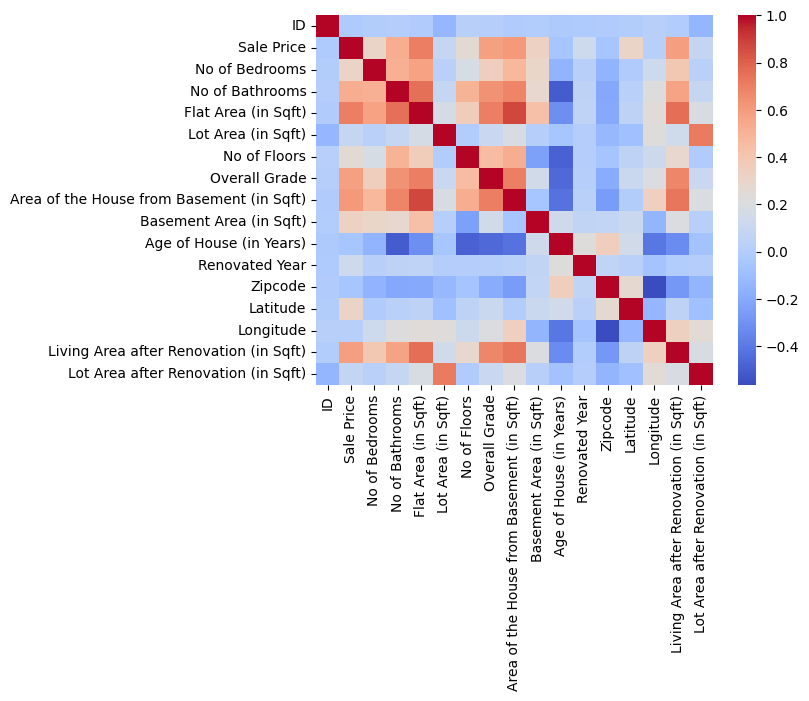

In [113]:
sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [114]:
for col in num_cols:
  num_df[col] = num_df[col].fillna(num_df[col].median())

In [115]:
num_df.isna().sum()

,0
ID,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Overall Grade,0
Area of the House from Basement (in Sqft),0
Basement Area (in Sqft),0


In [116]:
for col in cat_cols:
    print(cat_df[col].mode())

0    15 April 2016
Name: Date House was Sold, dtype: object
0    No
Name: Waterfront View, dtype: object
0    Fair
Name: Condition of the House, dtype: object


In [117]:
for col in cat_cols:
    cat_df[col] = cat_df[col].fillna(cat_df[col].mode()[0])

In [118]:
cat_df.isna().sum()

,0
Date House was Sold,0
Waterfront View,0
Condition of the House,0


In [ ]:
data = pd.concat([num_df, cat_df], axis = 1)

**Scaling Numerical Variables**

In [119]:
column_index = num_df.columns.get_loc('Sale Price')
scale_num_df = num_df.iloc[:, [i for i in range(len(num_df.columns)) if i != column_index]]


In [120]:
scale_num_df.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [121]:
scale_num_dfnum_df = pd.DataFrame(num_df, columns=num_cols)

In [122]:
scale_num_df.head(2)


,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639


In [123]:
for col in scale_num_df.columns:
 scale_num_df[col] = (scale_num_df[col]-scale_num_df[col].min())/(scale_num_df[col].max()-scale_num_df[col].min())

<ipython-input-123-2941c32466a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_num_df[col] = (scale_num_df[col]-scale_num_df[col].min())/(scale_num_df[col].max()-scale_num_df[col].min())
<ipython-input-123-2941c32466a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scale_num_df[col] = (scale_num_df[col]-scale_num_df[col].min())/(scale_num_df[col].max()-scale_num_df[col].min())
<ipython-input-123-2941c32466a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [124]:
scale_num_df.head(2)

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,0.720103,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.097588,0.000000,0.521739,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.647853,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.206140,0.082988,0.556522,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027


**Encoding Categorical Variables**

In [125]:
cat_df.head(2)


,Date House was Sold,Waterfront View,Condition of the House
0,14 October 2017,No,Fair
1,14 December 2017,No,Fair


In [126]:
cat_cols = cat_df.columns.tolist()


In [127]:
for col in cat_cols:
  print(cat_df[col].value_counts())

Date House was Sold
15 April 2016        2231
14 July 2017         2211
14 June 2017         2180
14 August 2017       1940
14 October 2017      1878
15 March 2016        1875
14 September 2017    1774
14 May 2017          1768
14 December 2017     1471
14 November 2017     1411
15 February 2016     1250
15 January 2016       978
15 May 2016           646
Name: count, dtype: int64
Waterfront View
No     21450
Yes      163
Name: count, dtype: int64
Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64


In [128]:
cat_df['Date House was Sold'] = pd.to_datetime(
    cat_df['Date House was Sold'],
    format='%d %B %Y')

# Extract useful numerical features
cat_df['sale_year'] = cat_df['Date House was Sold'].dt.year
cat_df['sale_month'] = cat_df['Date House was Sold'].dt.month
cat_df['sale_day'] = cat_df['Date House was Sold'].dt.day
cat_df['sale_dayofweek'] = cat_df['Date House was Sold'].dt.dayofweek  # Monday=0, Sunday=6
cat_df['sale_quarter'] = cat_df['Date House was Sold'].dt.quarter

In [129]:
cat_df.drop('Date House was Sold', axis=1, inplace=True)

In [130]:
cat_df['Waterfront View'] = cat_df['Waterfront View'].map({'No': 0, 'Yes': 1})

In [131]:
condition_mapping = {
    'Fair': 0,
    'Good': 1,
    'Excellent': 2,
    'Okay': 3,
    'Bad': 4
}

cat_df['Condition of the House'] = cat_df['Condition of the House'].map(condition_mapping)

In [132]:
cat_df.head()

,Waterfront View,Condition of the House,sale_year,sale_month,sale_day,sale_dayofweek,sale_quarter
0,0,0,2017,10,14,5,4
1,0,0,2017,12,14,3,4
2,0,0,2016,2,15,0,1
3,0,2,2017,12,14,3,4
4,0,0,2016,2,15,0,1


**Outlier Removal**

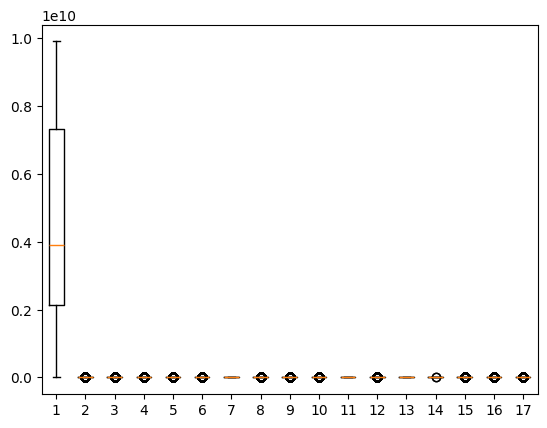

In [133]:
plt.boxplot(num_df)
plt.show()

In [134]:
def replace_outliers_with_upper_bound(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [135]:
for col in num_cols:
  num_df[col] = replace_outliers_with_upper_bound(num_df, col)

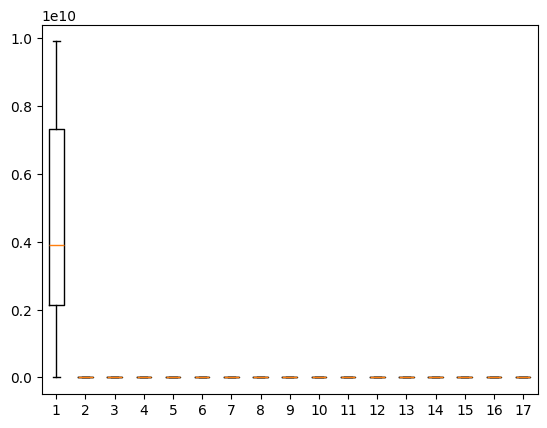

In [136]:
plt.boxplot(num_df)
plt.show()



**Train-Test Split**

In [137]:
final_df = pd.concat([scale_num_df, cat_df], axis=1)

In [138]:
final_df.head()


,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House,sale_year,sale_month,sale_day,sale_dayofweek,sale_quarter
0,0.720103,0.090909,0.12500,0.067170,0.003108,0.0,0.666667,0.097588,0.000000,0.521739,...,0.217608,0.161934,0.005742,0,0,2017,10,14,5,4
1,0.647853,0.090909,0.28125,0.172075,0.004072,0.4,0.666667,0.206140,0.082988,0.556522,...,0.166113,0.222165,0.008027,0,0,2017,12,14,3,4
2,0.568795,0.060606,0.12500,0.036226,0.005743,0.0,0.555556,0.052632,0.000000,0.713043,...,0.237542,0.399415,0.008513,0,0,2016,2,15,0,1
3,0.251157,0.121212,0.37500,0.126038,0.002714,0.0,0.666667,0.083333,0.188797,0.434783,...,0.104651,0.165376,0.004996,0,2,2017,12,14,3,4
4,0.197333,0.090909,0.25000,0.104906,0.004579,0.0,0.777778,0.152412,0.000000,0.243478,...,0.393688,0.241094,0.007871,0,0,2016,2,15,0,1


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [141]:
X_train

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House,sale_year,sale_month,sale_day,sale_dayofweek,sale_quarter
1440,0.750631,0.375,0.625000,0.840102,1.000000,0.0,0.875,0.585507,0.921429,0.565217,...,0.601288,0.744336,17557.5,0,0,2016,4,15,4,2
16552,0.425942,0.375,0.541667,0.532995,0.394740,0.0,1.000,0.489855,0.292857,0.582609,...,0.345025,1.000000,9075.0,0,0,2017,7,14,4,3
13794,0.080412,0.125,0.708333,0.642132,0.603784,0.4,0.375,0.388406,0.850000,0.591304,...,0.279170,0.395285,12500.0,0,0,2016,4,15,4,2
18951,0.250904,0.625,0.375000,0.497462,0.426030,0.0,0.625,0.336232,0.571429,0.530435,...,0.194703,0.474893,7198.0,0,0,2017,12,14,3,4
15568,0.258592,0.375,0.541667,0.431472,0.312894,0.4,0.375,0.492754,0.000000,0.417391,...,0.290623,0.251378,6250.0,0,0,2017,6,14,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,0.256238,0.625,0.708333,0.736041,0.560848,0.4,1.000,0.840580,0.000000,0.182609,...,0.701503,0.750459,8416.0,0,0,2017,6,14,2,2
13531,0.101263,0.375,0.125000,0.205584,0.383040,0.0,0.375,0.234783,0.000000,0.521739,...,0.335004,0.275873,8000.0,0,0,2017,8,14,0,3
9687,0.824186,0.625,0.541667,0.576142,0.451201,0.0,0.375,0.434783,0.550000,0.339130,...,0.355047,0.465707,9669.0,0,0,2017,7,14,4,3
16533,0.964664,0.375,0.291667,0.406091,0.208238,0.2,0.375,0.463768,0.000000,0.834783,...,0.276306,0.373852,4080.0,0,2,2017,12,14,3,4
